1) add comments --> clear
2) change df_35... df_no df_5
3)craete a readME file
4)get the req.txt file   -> pip freeze



**Course: IND ENG 210 Python for Analytics**

**Group: Anmol Gupta, Raushan Khullar, Serah Varghese, Shravani Nimbolkar**

**Project Title: Analysis and Prediction of Walmart Sales**

As analysts at Walmart we are trying to predict future sales. There are numerous seasons in which sales are significantly above or below normal. If the company is unaware of these seasons, it may incur excessive financial losses. Predicting future sales is one of the most essential business strategies. Sales forecasting provides the organization with information for ordering inventory, estimating revenue, and deciding on a new investment. A further advantage of anticipating future sales is that exceeding specified targets at the start of the season can have a beneficial impact on stock prices and investor views. In addition, failing to attain the projected goal might considerably harm stock prices. And it will be a significant issue for Walmart as a large corporation. During the exploratory data analysis we will see what factors affect the sales which in turn will provide meaningful insights for better decision making. 
Implementation :

1.	Data Pre-processing
2.	Exploratory Data Analysis
3.	ARIMA/SARIMA to predict future sales



**Importing all the necessary packages**

In [1]:
!conda list
!pip install pipfreeze
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

# packages in environment at C:\Users\anmol\anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
aiohttp                   3.8.1            py39h2bbff1b_1  
aiosignal                 1.2.0              pyhd3eb1b0_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2022.05                  py39_0  
anaconda-client           1.9.0            py39haa95532_0  
anaconda-navigator        2.1.4            py39haa95532_0  
anaconda-project          0.10.2             pyhd3eb1b0_0  
anyio                     3.5.0            py39haa95532_0  
appdirs                   1.4.4              pyhd3eb1b0_0  
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py39h2bbff1b_0  
arrow                     1.2.2              pyhd3eb1b0_0  
astroid                   2.6.6            py39haa95532_0  
astropy                   5.0.4     

**Reading files containig data and storing it in data frame**

In [2]:
features=pd.read_csv("features.csv")
print(features.head())
stores=pd.read_csv("stores.csv")
stores.head()

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [3]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

**Merging different dataframes to form one dataframe**

In [4]:
df = features.merge(stores, how='inner', on='Store')
df.head()
print(df.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')


In [5]:
df = train.merge(df, how='inner', on=['Store', 'Date', 'IsHoliday']).sort_values(by=['Store','Dept','Date']).reset_index(drop=True)

In [6]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


**Converting date to a standard format**

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df['Week'] = df.Date.dt.isocalendar().week # for the week data
df['Year'] = df.Date.dt.isocalendar().year # for the year data
df['Month'] = pd.DatetimeIndex(df['Date']).month  # for the month data


df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Year,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2010,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,6,2010,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,7,2010,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,8,2010,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,9,2010,3


In [8]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Year,Month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,25.826762,2010.968591,6.449510
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,14.151887,0.796876,3.243217
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.000000,2010.000000,1.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,14.000000,2010.000000,4.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,26.000000,2011.000000,6.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,38.000000,2012.000000,9.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.000000,2012.000000,12.000000


Looking at the min value of weeklysales, there is a negative value,hence we need to get rid of all rows that has weekly_sales <0

In [9]:
df=df[df['Weekly_Sales']>0]
df.shape

(420212, 19)

**Performing a preliminary analysis of data to identify and drop datapoints which are not relevant**

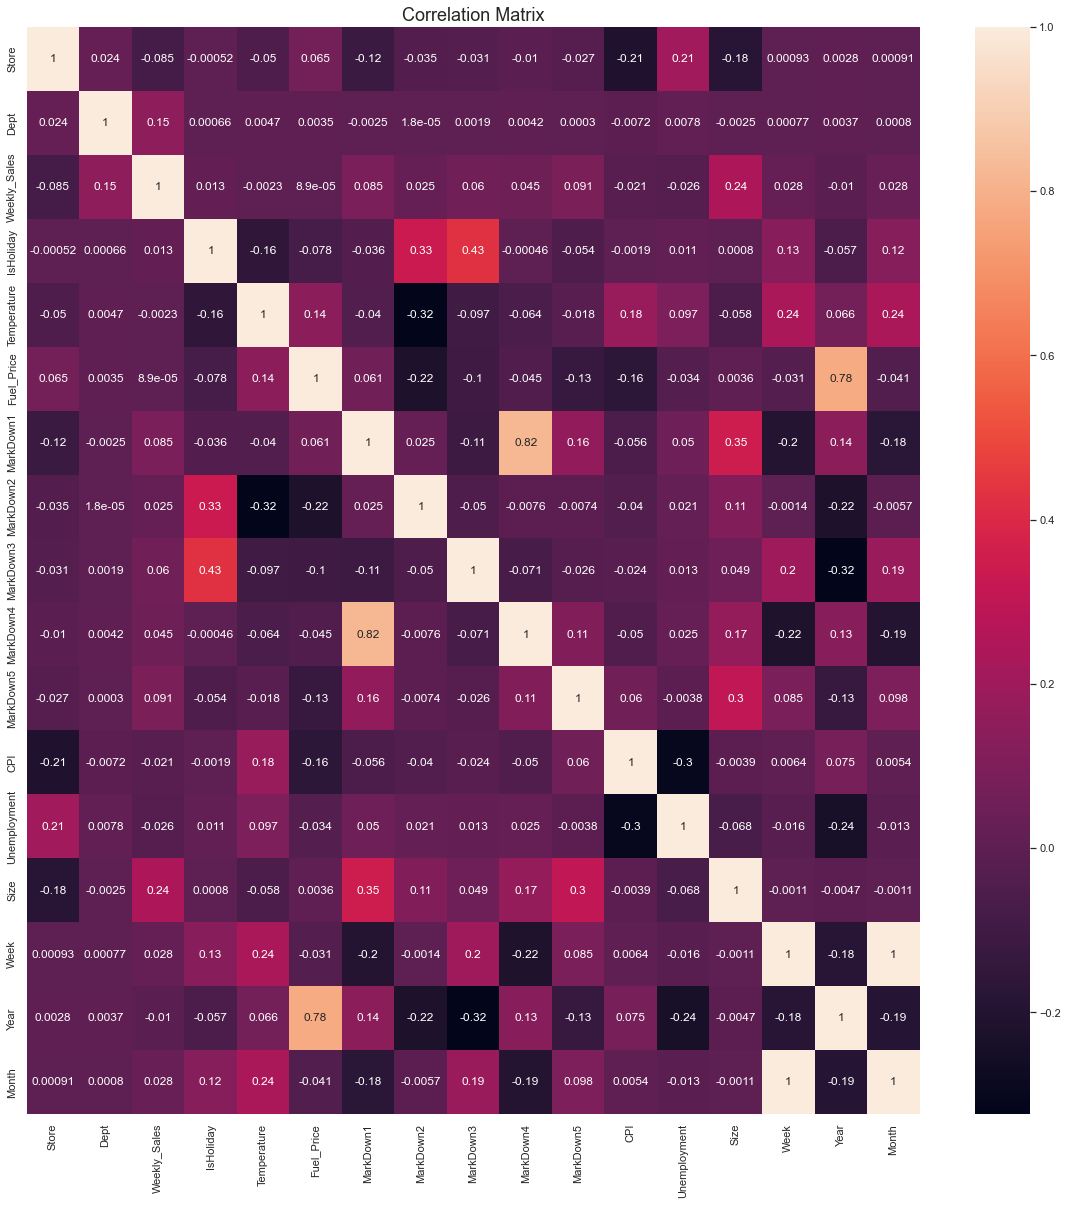

In [10]:
#finding relevant features:
plt.figure(figsize=(20,20))
sns.set(style = "white")
corr = df.corr()

# f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr,annot=True)
plt.show()

**Markdown 2 and Markdown 4 dropeed because it does not have sufficient correlation with other variables**

In [11]:
df.isnull().sum()

#contains missing values

df.drop(['MarkDown2','MarkDown4'], axis=1, inplace=True)

**Replacing NA values with the median**

In [12]:
df['MarkDown1'] = df['MarkDown1'].fillna(df['MarkDown1'].median())

df['MarkDown3'] = df['MarkDown3'].fillna(df['MarkDown3'].median())
df['MarkDown5'] = df['MarkDown5'].fillna(df['MarkDown5'].median())
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown5,CPI,Unemployment,Type,Size,Week,Year,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,5347.45,24.6,3359.45,211.096358,8.106,A,151315,5,2010,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,5347.45,24.6,3359.45,211.242170,8.106,A,151315,6,2010,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,5347.45,24.6,3359.45,211.289143,8.106,A,151315,7,2010,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,5347.45,24.6,3359.45,211.319643,8.106,A,151315,8,2010,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,5347.45,24.6,3359.45,211.350143,8.106,A,151315,9,2010,3


**Finding the correlation after updating the dataframe**

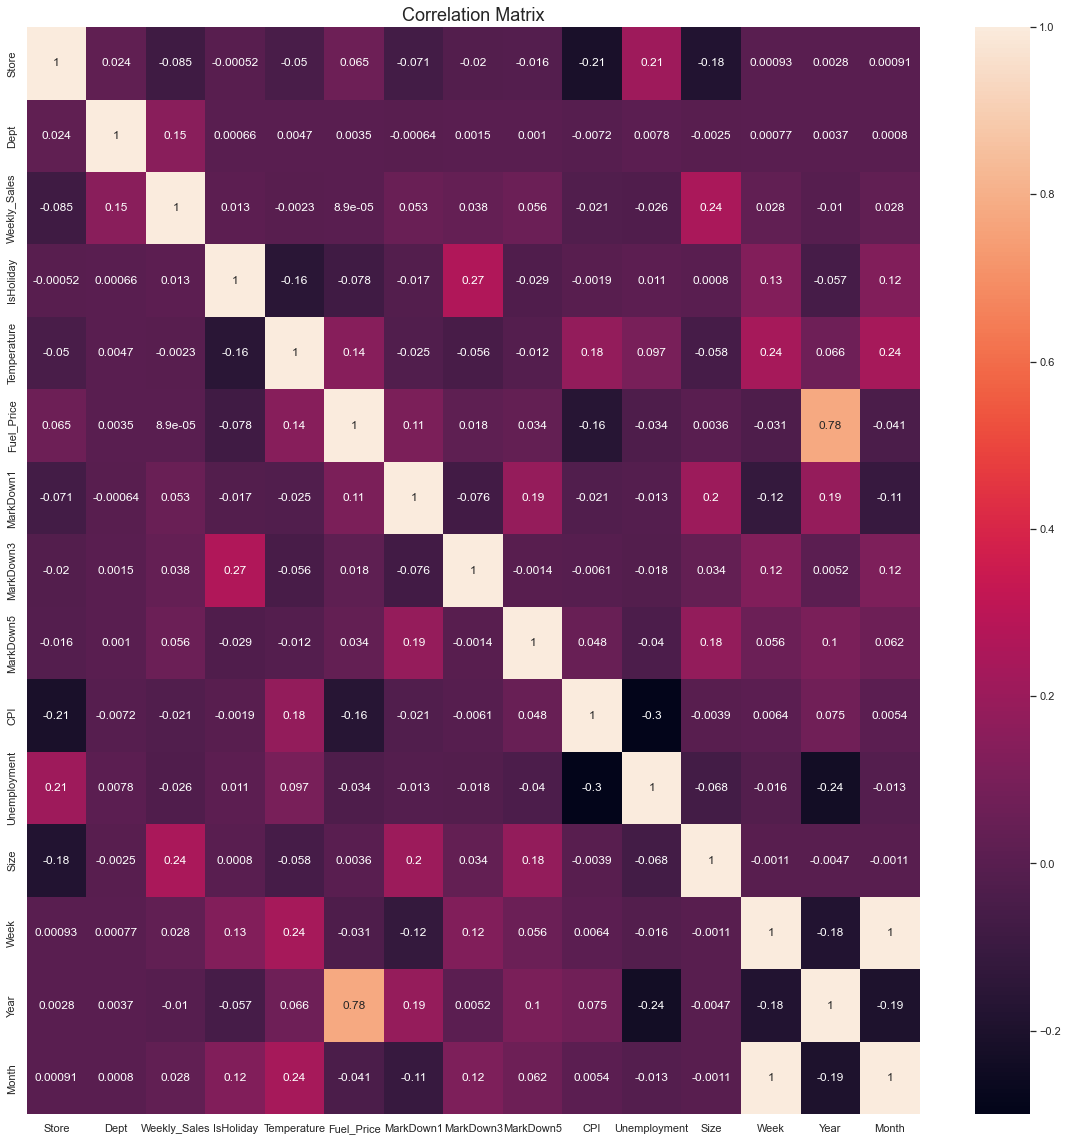

In [13]:
#finding relevant features:
plt.figure(figsize=(20,20))
sns.set(style = "white")
corr = df.corr()

# f, ax = plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.title('Correlation Matrix', fontsize=18)
sns.heatmap(corr,annot=True)
plt.show()

Markdown 1 and 4 and markdown 1 and 5 have a high correlation and are independent variables. fuel price, temp

# Exploratory Data Analysis

**This section is about analysing the Weekly Sales with respect to different Holiday and Non-Holiday Seasons**

In [14]:
sorted_type = stores.groupby('Type').count()
sorted_type

,Store,Size
Type,,
A,22,22
B,17,17
C,6,6


In [15]:
#mean of weekly sales according to store types
type_mean=df.groupby('Type').Weekly_Sales.mean()
type_mean
#type A has highest mean weekly sales

Type
A    20148.108162
B    12290.549297
C     9549.454168
Name: Weekly_Sales, dtype: float64

Type
A    22
B    17
C     6
Name: Size, dtype: int64


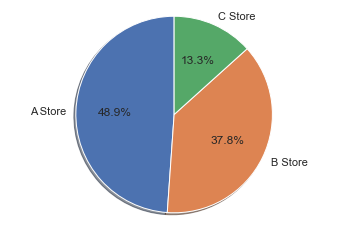

In [16]:
sizes=sorted_type['Size']
print(sizes)
labels='A Store','B Store','C Store'
fig1,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

Stores with type A are the highest in number with the highest mean weekly sales and type C stores have the least.

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

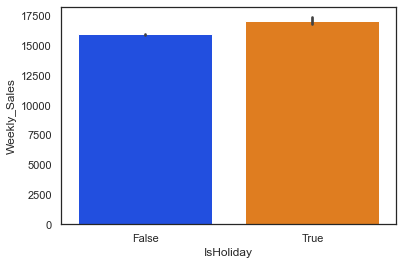

In [17]:
holiday = df['Weekly_Sales'].loc[df['IsHoliday']== True] # Weekly Sales in Holidays
non_holiday = df['Weekly_Sales'].loc[df['IsHoliday']== False] #Weekly Sales in Non-holidays.
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df,palette='bright')

**This graph show overall avaerage weekly sales during Holiday and Non Holiday seasons. In further sections we'll**/**group holidays based on different seasons/festivals and see a further in depth analysis of Sales with respect to different holiday seasons**

**Grouping dates to identify holidays during certain festivals and creating a new column for that festival with values set as True or False depending on if the festival season falls on those dates or not**

**1. Defining dates for superbowl**

In [18]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

**2.Defining dates for Labor Day**

In [19]:
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

**3.Defining Dates for Thanksgiving**

In [20]:
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

**4.Defining dates for Christmas**

In [21]:
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

**Analysis Of Christmas week sale wrt non-Holiday days sales across the year**

Here it is observed that there is no significant increase in sales during Christmas Season. Infact sales during the non holiday seasn is slightly higher than the Christmas season.

<AxesSubplot:xlabel='Christmas', ylabel='Weekly_Sales'>

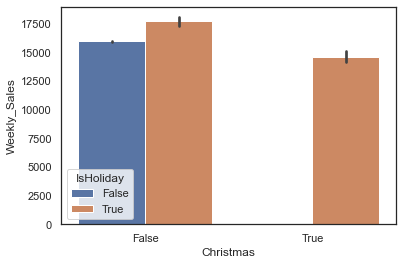

In [22]:


ax=plt.subplots()
#ax=sns.barplot(x='Christmas', y='Weekly_Sales', data=dataChristmasHoliday, color='green')

#ax=sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df, color='red')
sns.barplot(x='Christmas', y='Weekly_Sales', hue='IsHoliday',data=df)

**Analysis Of Thanksgiving week sales wrt non-Holiday days sales across the year**

Is observed that during Thanks Giving the sales is significantly higher than Non-Holiday season

<AxesSubplot:xlabel='Thanksgiving', ylabel='Weekly_Sales'>

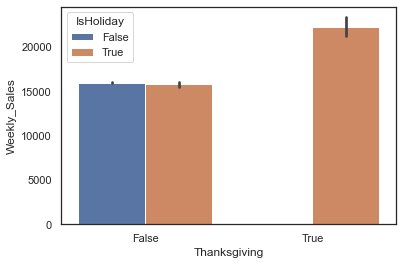

In [23]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', hue='IsHoliday',data=df)

**Analysis Of Super Bowlg week sales wrt non-Holiday days sales across the year**

<AxesSubplot:xlabel='Super_Bowl', ylabel='Weekly_Sales'>

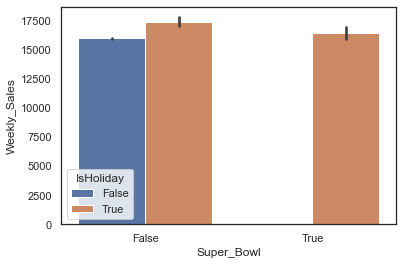

In [24]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', hue='IsHoliday',data=df)

**Analysis Of Labor Day week sales wrt non-Holiday days sales across the year**

<AxesSubplot:xlabel='Labor_Day', ylabel='Weekly_Sales'>

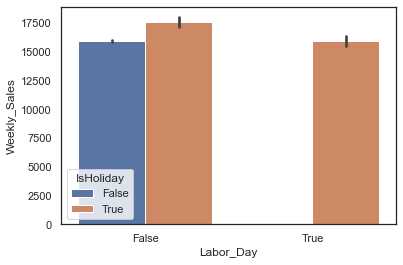

In [25]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', hue='IsHoliday',data=df)

In [26]:
month_Sales=df.groupby('Month')['Weekly_Sales'].mean() # to see the best months for sales

In [27]:
df.groupby('Year')['Weekly_Sales'].mean() # to see the best years for sales

Year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

**Defining a function to plot scatter plots to identify different trends and relation between Weekly Sales and other variables**

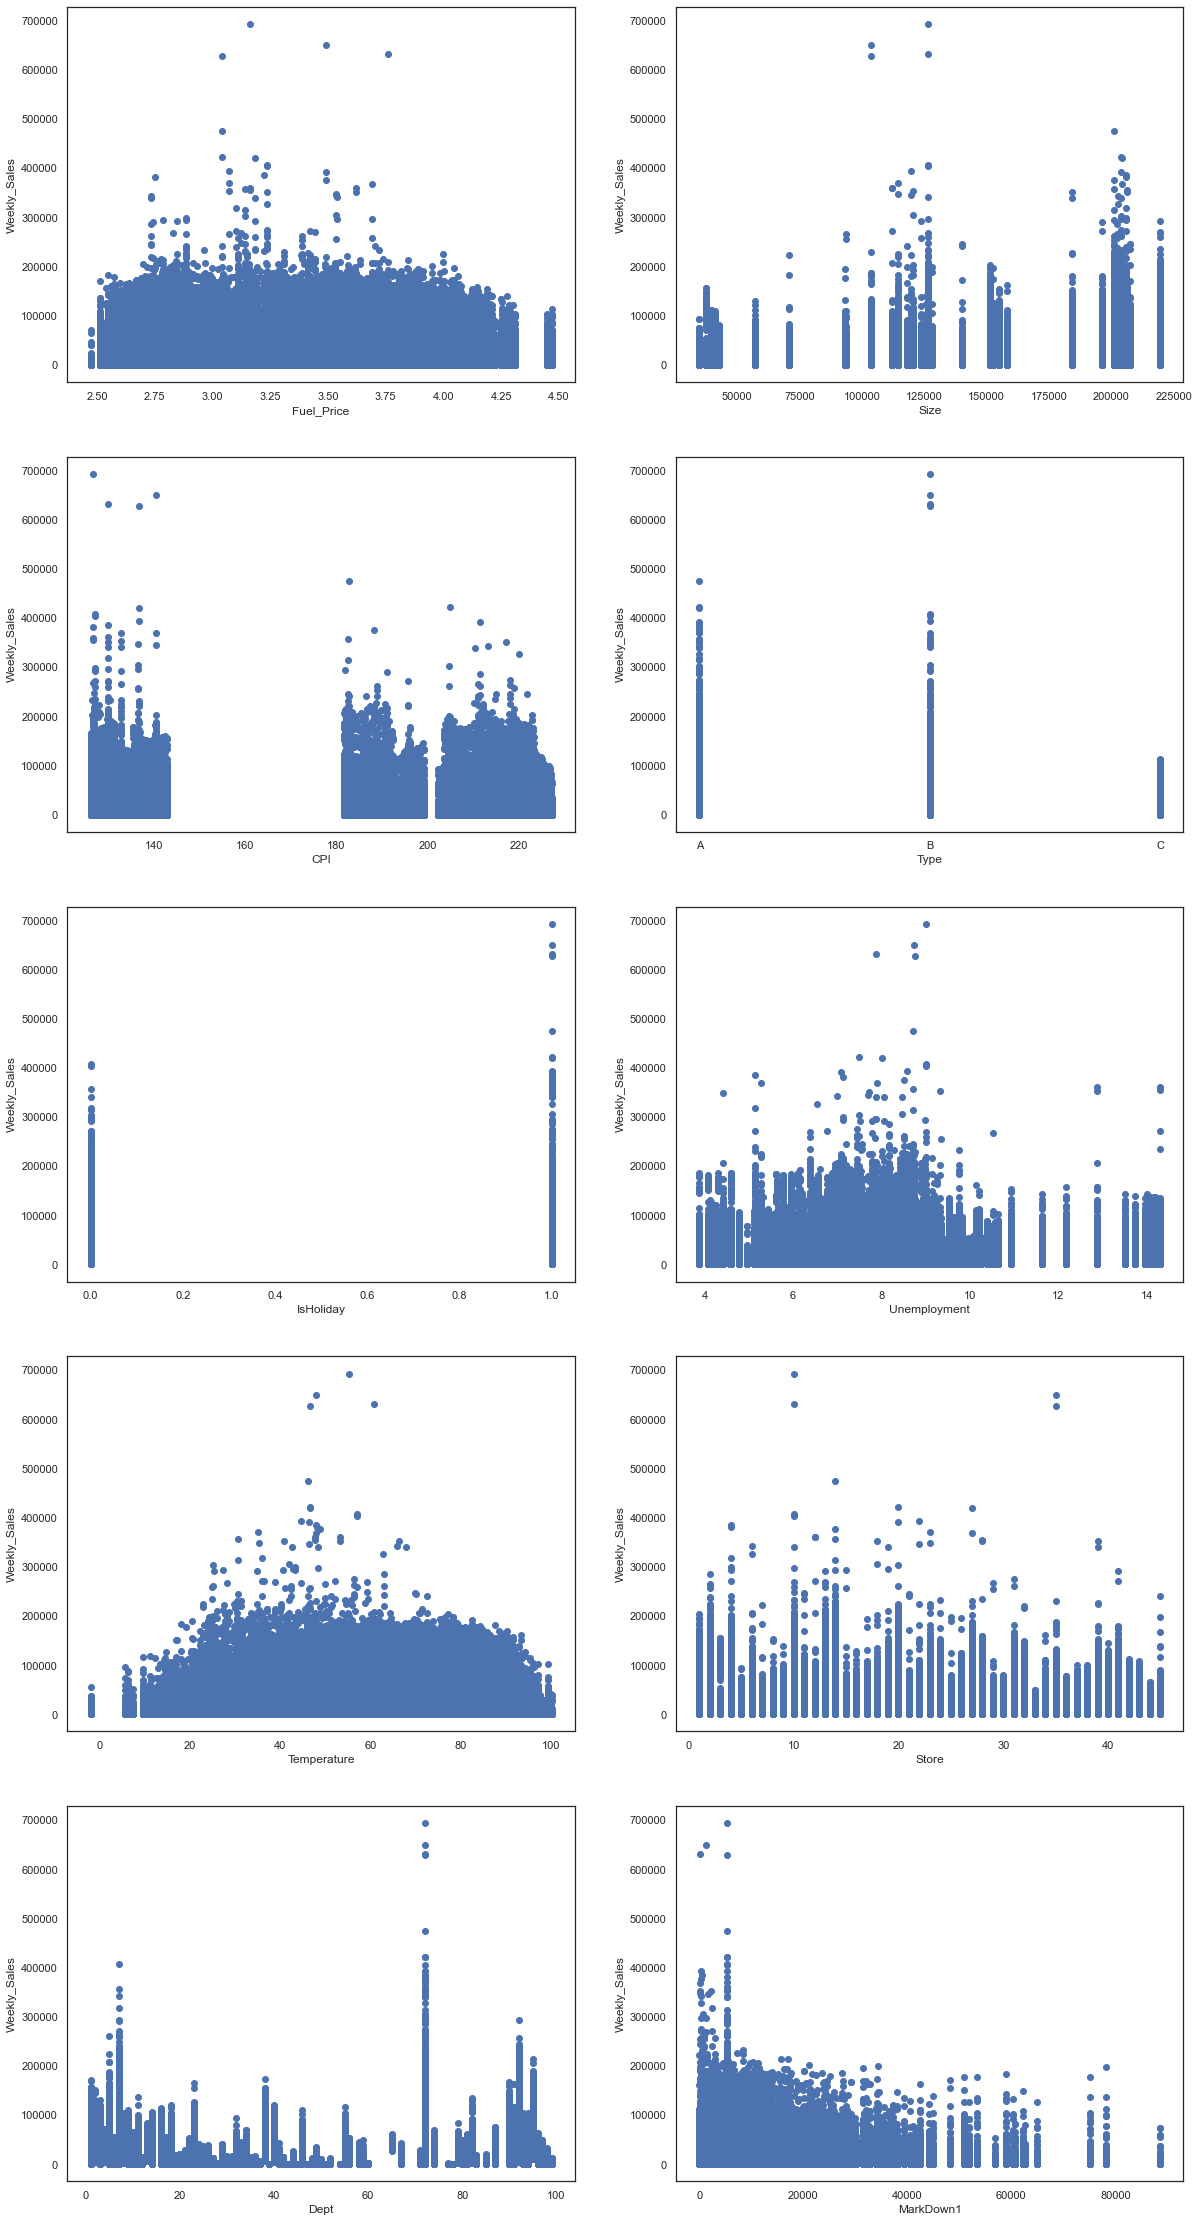

In [28]:
plt.figure(figsize=(20,40))
def scatter(df, column,pos):    
    plt.subplot(5,2,pos)
    plt.scatter(df[column] , df['Weekly_Sales'])
    
    #plt.scatter(df[column] , df['Unemployment'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

    
    #show scatter plot b/w 2 variables
scatter(df, 'Fuel_Price',1)  # with respect to Fuel_Price
scatter(df, 'Size',2)  # with respect to Size
scatter(df, 'CPI',3)  # with respect to CPI
scatter(df, 'Type',4)  # with respect to Type  #removeee
scatter(df, 'IsHoliday',5) # with respect to IsHoliday
scatter(df, 'Unemployment',6)  # with respect to Unemployment
scatter(df, 'Temperature',7) # with respect to Temperature
scatter(df, 'Store',8) # with respect to Store
scatter(df, 'Dept',9)  # with respect to Dept
scatter(df, 'MarkDown1',10)  # with respect to Dept
#scatter(df, 'MarkDown2',11)  # with respect to Dept
#scatter(df, 'MarkDown3',12)  # with respect to Dept

**Plotting Average Weekly Sales with respect to Weeks to identify sales trends**

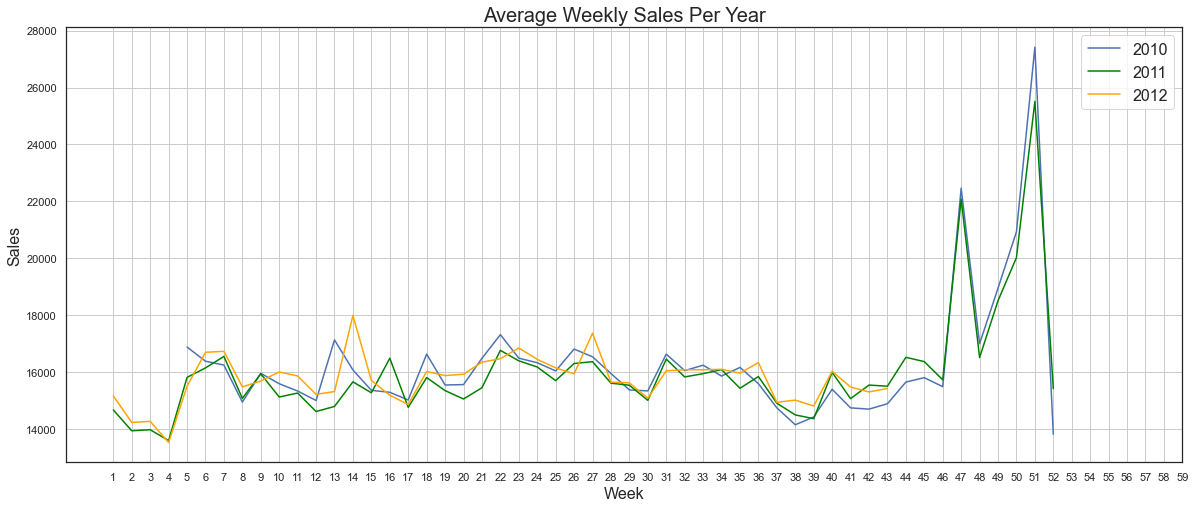

In [29]:
weekly_sales_2010 = df[df['Year']==2010]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sales_2011 = df[df['Year']==2011]['Weekly_Sales'].groupby(df['Week']).mean()
weekly_sales_2012 = df[df['Year']==2012]['Weekly_Sales'].groupby(df['Week']).mean()


plt.figure(figsize=(20,8))
plt.plot(weekly_sales_2010,linestyle="solid")
plt.plot(weekly_sales_2011,color="green")
plt.plot(weekly_sales_2012,color="orange")
plt.grid()
plt.xticks(np.arange(1,60, step=1))
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Weekly Sales Per Year', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Week', fontsize=16)
plt.show()

**As observed from this graph, the average weekly sales varies with time and is non stationary. In the next section we'll perform Dickey Fuller test make perform  ARIMA analysis to predict future sales**

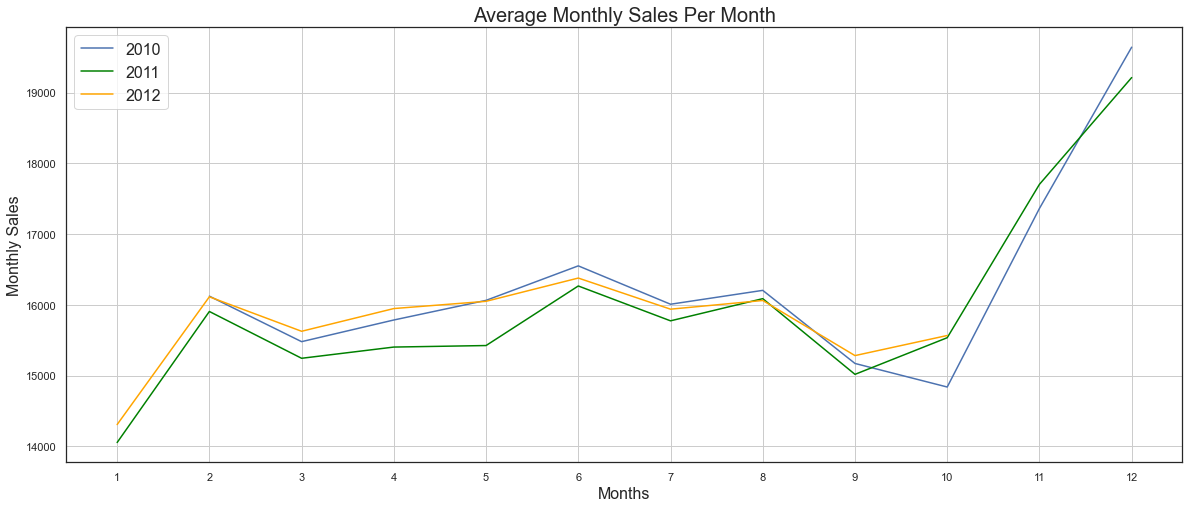

In [30]:
weekly_sales_2010 = df[df['Year']==2010]['Weekly_Sales'].groupby(df['Month']).mean()
weekly_sales_2011 = df[df['Year']==2011]['Weekly_Sales'].groupby(df['Month']).mean()
weekly_sales_2012 = df[df['Year']==2012]['Weekly_Sales'].groupby(df['Month']).mean()


plt.figure(figsize=(20,8))
plt.plot(weekly_sales_2010,linestyle="solid")
plt.plot(weekly_sales_2011,color="green")
plt.plot(weekly_sales_2012,color="orange")
plt.grid()
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend(['2010', '2011', '2012'], loc='best', fontsize=16)
plt.title('Average Monthly Sales Per Month', fontsize=20)
plt.ylabel('Monthly Sales', fontsize=16)
plt.xlabel('Months', fontsize=16)
plt.show()

**We see that the maximum sales rise sharply in the month of November during Thanksgiving season in 2010, 2011 and 2012**

C:\Users\anmol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


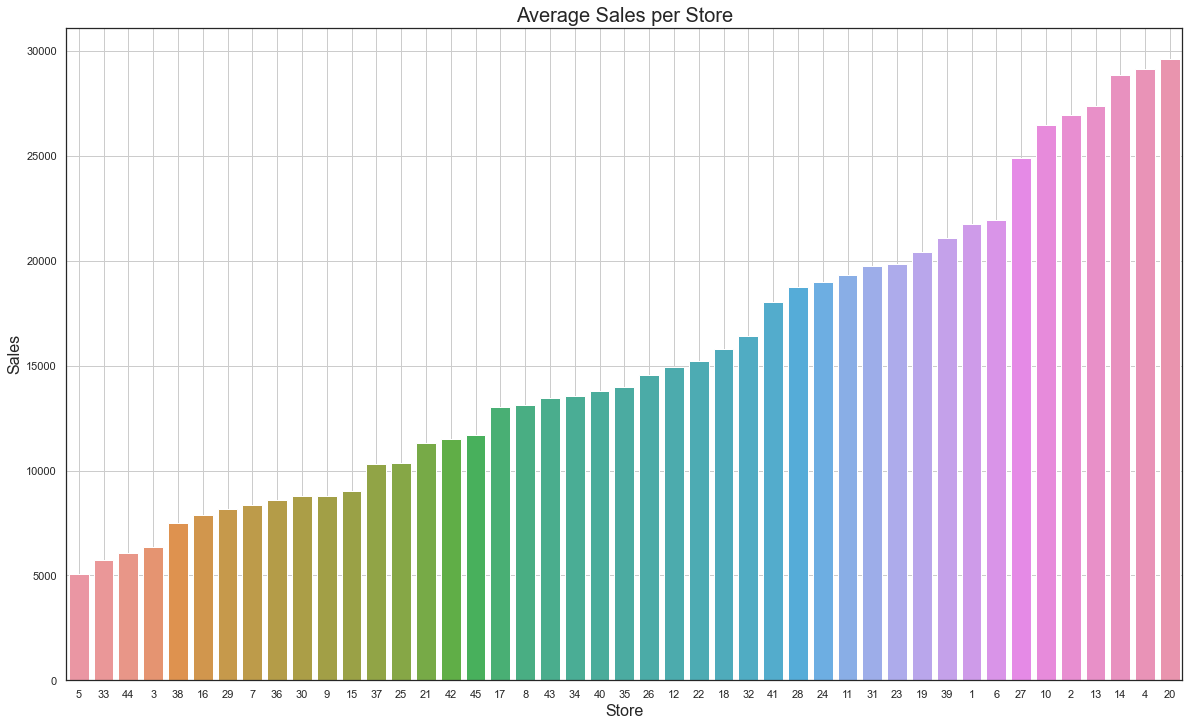

In [31]:
weekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean()
plt.figure(figsize=(20,12))
weekly_sales = df['Weekly_Sales'].groupby(df['Store']).mean()
weekly_sales = weekly_sales.sort_values()
l1=list(weekly_sales.index)


#plt.xticks(np.arange(1,46,1))
weekly_sales=weekly_sales.sort_values(ascending=True)

sns.barplot(weekly_sales.index,weekly_sales.values, order=l1)

#sort_values(ascending=False)
plt.grid()
plt.title('Average Sales per Store', fontsize=20)
plt.xlabel('Store', fontsize=16)
plt.ylabel('Sales', fontsize=16)
plt.show()

**As observed from this graph, the average weekly for store 5 is the least and store 20 is maximum. In the next section we'll see the contrast between store with max sales and minimum sales. We'll perform  make perform ARIMA analysis to predict future sales of store 5 and come to a final conclusion about its future sales and take necessary action**

Store 5 vs Store 20

In [32]:
df5=df.query('Store==5')

In [33]:
df20=df.query('Store==20')

In [34]:
df_comparison=df5.append(df20)


C:\Users\anmol\AppData\Local\Temp\ipykernel_3188\1042636423.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_comparison=df5.append(df20)


<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

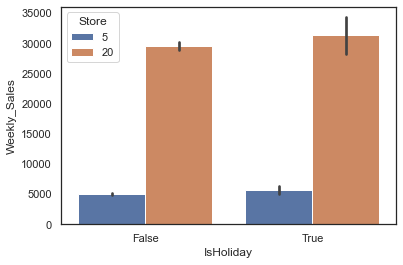

In [35]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', hue='Store',data=df_comparison)

In [36]:
#df5.corr()

# Performing Dickey Fuller Test and ARIMA 

In [37]:
df.set_index('Date', inplace=True)

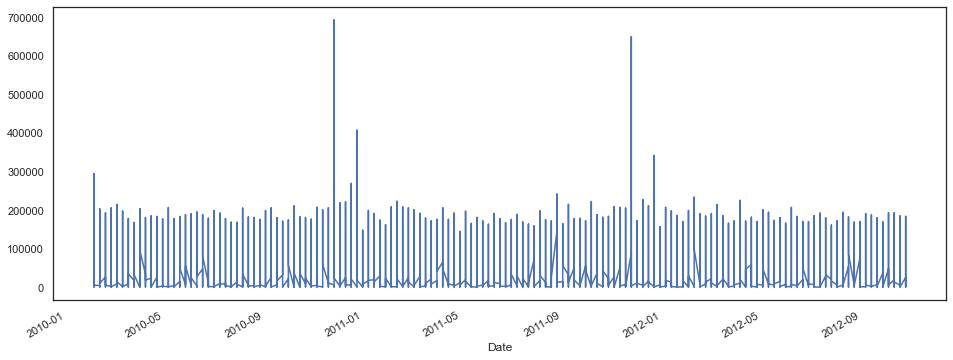

In [38]:
plt.figure(figsize=(16,6))
df['Weekly_Sales'].plot()
plt.show()

In [39]:
store_5 = df[df.Store == 5]
store_5.head(3)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown3,MarkDown5,CPI,Unemployment,Type,Size,Week,Year,Month,Super_Bowl,Labor_Day,Thanksgiving,Christmas
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,5,1,9323.89,False,39.70,2.572,5347.45,24.6,3359.45,211.653972,6.566,B,34875,5,2010,2,False,False,False,False
2010-02-12,5,1,16861.10,True,39.81,2.548,5347.45,24.6,3359.45,211.800470,6.566,B,34875,6,2010,2,True,False,False,False
2010-02-19,5,1,11417.67,False,41.14,2.514,5347.45,24.6,3359.45,211.847128,6.566,B,34875,7,2010,2,False,False,False,False


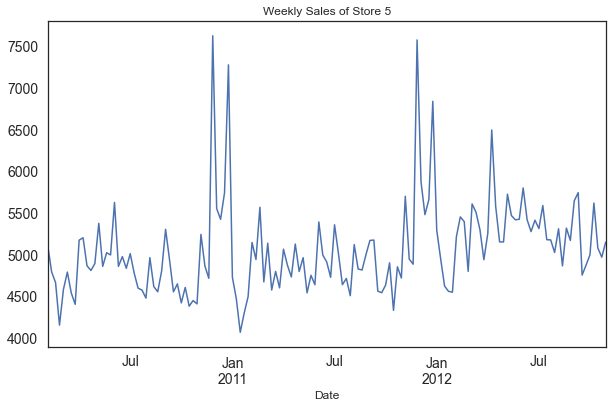

In [40]:
df_5_week = store_5.resample('W').mean()
df_5_week.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of Store 5', fontsize=14,)
plt.show()

<Figure size 432x288 with 0 Axes>

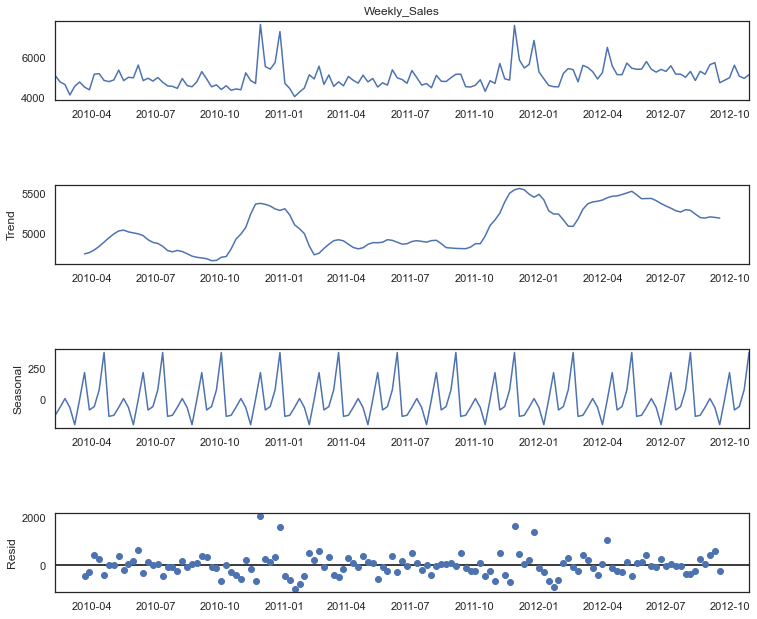

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_5_week.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

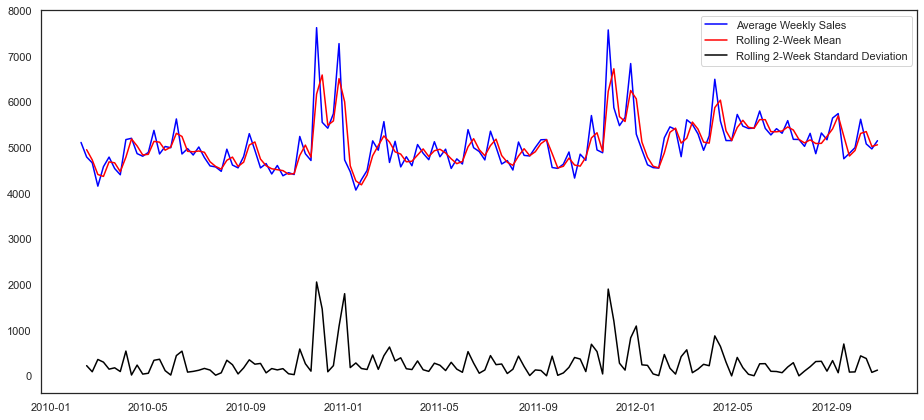

In [42]:
#To Observe 2-weeks Rolling Mean and Std
roll_mean = df_5_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std= df_5_week['Weekly_Sales'].rolling(window=2, center=False).std()
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_5_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [43]:
#Train - Test Split of Weekly Data

train_data = df_5_week[:int(0.8*(len(df_5_week)))] 
test_data = df_5_week[int(0.8*(len(df_5_week))):]
print('Train:', train_data.shape)
print('Test:', test_data.shape)


Train: (114, 15)
Test: (29, 15)


In [44]:
target = "Weekly_Sales"
used_cols = [c for c in df_5_week.columns.to_list() if c not in [target]] # all columns except price
print(used_cols)
# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown3', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Week', 'Year', 'Month']


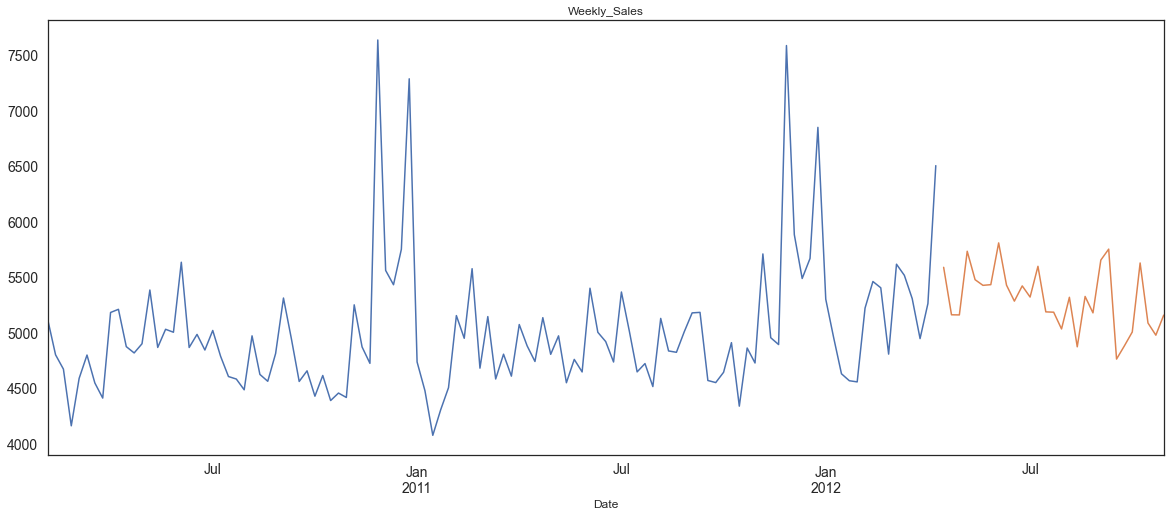

In [45]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

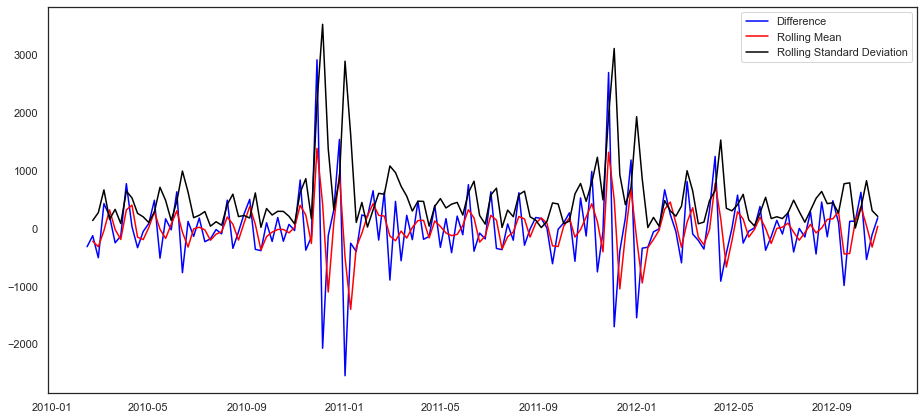

In [46]:
#making data stationary

df_5_week_diff = df_5_week['Weekly_Sales'].diff().dropna()
# taking mean and std of differenced data
diff_roll_mean = df_5_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_5_week_diff.rolling(window=2, center=False).std()
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_5_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [47]:
df_5_week_diff=pd.DataFrame(df_5_week_diff)

In [48]:
from statsmodels.tsa.stattools import adfuller
#adfuller test to test stationarity of data
result = adfuller(df_5_week_diff["Weekly_Sales"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.970143
p-value: 0.000000
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578


**p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.**

In [49]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [50]:
#auto arima
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

train_data_diff = df_5_week_diff [:int(0.8*(len(df_5_week_diff )))]
test_data_diff = df_5_week_diff [int(0.8*(len(df_5_week_diff ))):]
model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1799.091, Time=0.00 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1767.617, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1782.951, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1774.558, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1766.238, Time=0.03 sec

ARIMA(maxiter=200, order=(4, 0, 0), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

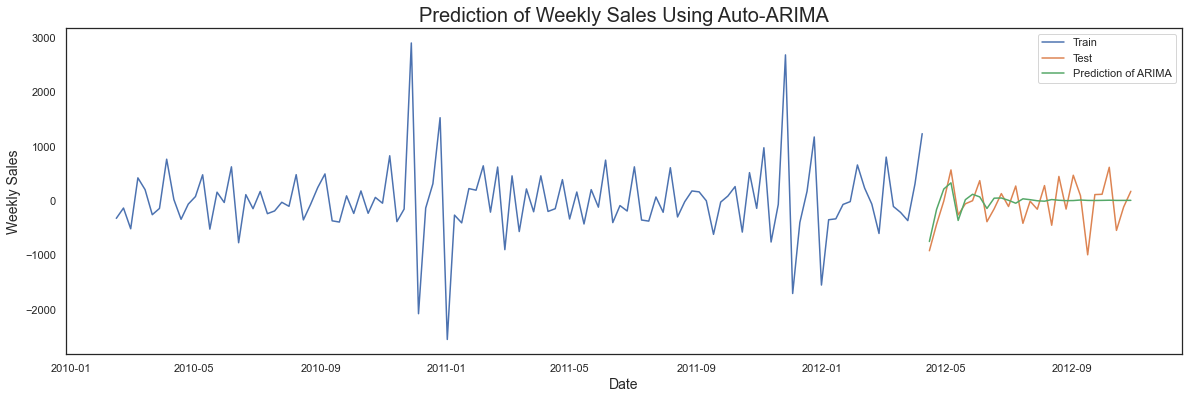

In [51]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data_diff.index,columns=['Prediction'])

plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [52]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(test_data_diff,y_pred))
print(rms)

335.4943038416037
